In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split ,cross_validate,cross_val_score 
from sklearn.metrics import accuracy_score ,confusion_matrix ,roc_auc_score ,roc_curve
from sklearn.preprocessing import StandardScaler  
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [79]:
data =sm.datasets.fair.load_pandas().data
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [80]:
#type(data)
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [81]:
data['affair'] = (data.affairs > 0).astype(int)
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
affair             6366 non-null int32
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


In [83]:
data.groupby('affair').mean()
# Here we can see on average womens giving low marriage rate and more in age are have high chances of affair

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [84]:
data.groupby('rate_marriage').mean()
# Here we can see on average womens having lowest marriage rate(1.0) are little aged , have more no of yrs married & have more
#childrens

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [85]:
sample_data =data.copy()
sample_data.drop(['affairs'],axis=1,inplace=True)
sample_data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0


In [86]:
print('No of womens giving 1st rating to marriage: ',sample_data[sample_data['rate_marriage'] ==1]['rate_marriage'].count())
print('No of womens giving 2nd rating to marriage: ',sample_data[sample_data['rate_marriage'] ==2]['rate_marriage'].count())
print('No of womens giving 3rd rating to marriage: ',sample_data[sample_data['rate_marriage'] ==3]['rate_marriage'].count())
print('No of womens giving 4th rating to marriage: ',sample_data[sample_data['rate_marriage'] ==4]['rate_marriage'].count())
print('No of womens giving 5th rating to marriage: ',sample_data[sample_data['rate_marriage'] ==5]['rate_marriage'].count())

No of womens giving 1st rating to marriage:  99
No of womens giving 2nd rating to marriage:  348
No of womens giving 3rd rating to marriage:  993
No of womens giving 4th rating to marriage:  2242
No of womens giving 5th rating to marriage:  2684


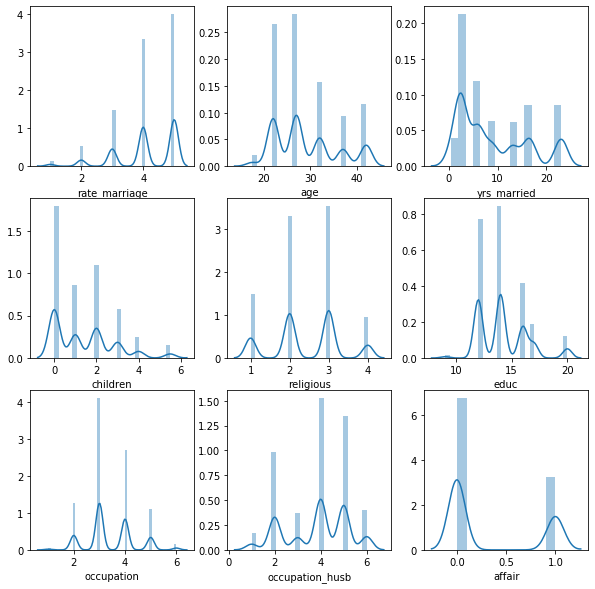

In [87]:
plt.figure(figsize=(10,10))
pt=1
for i in sample_data:
    if pt <=9:
        plt.subplot(3,3,pt)
        #plt.hist(sample_data[i])
        sns.distplot(sample_data[i])
        plt.xlabel(i)
    pt+=1
plt.show()        

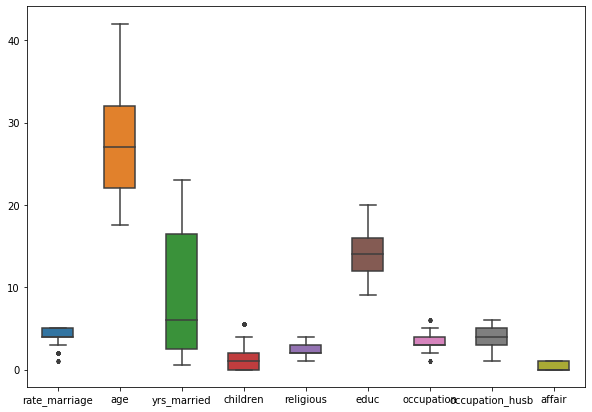

In [88]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(data=sample_data, width= 0.5,ax=ax,  fliersize=3)

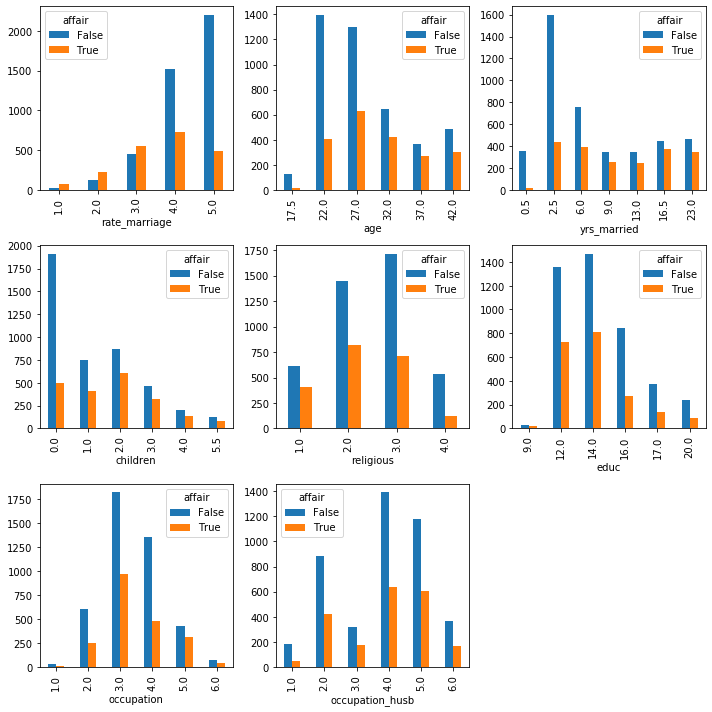

In [90]:
plt.figure(figsize=(10,10))
pt=1
#plt.xlim([0,45]) # here the range on x - axis will be from 0-100
for i in sample_data.drop(['affair'],axis=1):
    if pt <=9:
        ax=plt.subplot(3,3,pt)
        z=pd.crosstab(sample_data[i], sample_data['affair'].astype(bool)).plot(kind='bar',ax=ax)
    pt+=1
plt.tight_layout()  

In [91]:
y, x = dmatrices('affair ~ rate_marriage + age +yrs_married + children + religious + educ +C(occupation) + C(occupation_husb)',
data, return_type="dataframe")

In [92]:
print('The unique values for occupation are : ',sorted(data['occupation'].unique()))
print('The unique values for occupation_husb are : ',sorted(data['occupation_husb'].unique()))
print('The unique values for religious are : ',sorted(data['religious'].unique()))
print('The unique values for children are : ',sorted(data['children'].unique()))
x.head(5)

The unique values for occupation are :  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
The unique values for occupation_husb are :  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
The unique values for religious are :  [1.0, 2.0, 3.0, 4.0]
The unique values for children are :  [0.0, 1.0, 2.0, 3.0, 4.0, 5.5]


,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [93]:
x = x.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)
print('The value of y After flatning into 1-d: ',y)
x

The value of y After flatning into 1-d:  [1. 1. 1. ... 0. 0. 0.]


,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [94]:
sc= StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 0.        ,  2.531984  , -0.88131913, ...,  1.11844056,
         0.65334148,  1.28115287],
       [ 0.        , -0.3949472 ,  1.13466276, ...,  1.11844056,
        -1.62378518, -0.09636416],
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.97454634,
        -1.62378518,  0.82198052],
       ...,
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.97454634,
        -0.48522185, -0.09636416],
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.27688404,
         0.65334148, -0.09636416],
       [ 0.        ,  2.531984  , -0.88131913, ..., -0.97454634,
        -0.48522185,  0.82198052]])

In [33]:
x_scaled.shape

(6366, 17)

In [34]:
x.shape

(6366, 17)

In [95]:
var=x_scaled
vif=pd.DataFrame()
vif['column_name']=x.columns
vif['vif']=[variance_inflation_factor(var,i)for i in range(x.shape[1])]
vif

C:\Users\Windows 10\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,column_name,vif
0,Intercept,NaN
1,occ_2,19.340780
2,occ_3,39.335618
3,occ_4,32.931910
4,occ_5,17.057165
5,occ_6,3.697959
6,occ_husb_2,5.566292
7,occ_husb_3,2.991070
8,occ_husb_4,6.930281
9,occ_husb_5,6.577077


In [96]:
x_new=pd.DataFrame(x_scaled ,columns=x.columns)
x_new

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,0.0,2.531984,-0.881319,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,-0.684232,1.605744,-0.301356,-1.154252,0.426025,-0.001295,1.118441,0.653341,1.281153
1,0.0,-0.394947,1.134663,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,1.461493,-0.622764,-0.301356,-1.154252,-0.304185,0.548190,1.118441,-1.623785,-0.096364
2,0.0,-0.394947,1.134663,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,-0.684232,1.605744,-0.301356,-0.114053,-1.034396,-0.894207,-0.974546,-1.623785,0.821981
3,0.0,-0.394947,-0.881319,-0.636143,2.757300,-0.131987,-0.508528,-0.288773,-0.684232,1.605744,-0.301356,-0.114053,1.156235,1.028989,1.816103,0.653341,0.821981
4,0.0,-0.394947,1.134663,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,1.461493,-0.622764,-0.301356,0.926147,-0.304185,-0.001295,-0.276884,-1.623785,-0.096364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,0.0,-0.394947,-0.881319,1.571974,-0.362674,-0.131987,-0.508528,3.462923,-0.684232,-0.622764,-0.301356,0.926147,0.426025,0.548190,0.420778,0.653341,1.281153
6362,0.0,-0.394947,-0.881319,-0.636143,2.757300,-0.131987,-0.508528,-0.288773,-0.684232,1.605744,-0.301356,-0.114053,0.426025,0.548190,-0.276884,-1.623785,0.821981
6363,0.0,-0.394947,1.134663,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,-0.684232,-0.622764,-0.301356,0.926147,-1.034396,-0.894207,-0.974546,-0.485222,-0.096364
6364,0.0,-0.394947,1.134663,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,1.461493,-0.622764,-0.301356,0.926147,0.426025,-0.413408,-0.276884,0.653341,-0.096364


In [97]:
x_new.drop(['Intercept','occ_2','occ_3','occ_4','occ_5','occ_husb_2','occ_husb_4','occ_husb_5','age',
           'yrs_married'],axis=1,inplace=True)

In [98]:
x_new

,occ_6,occ_husb_3,occ_husb_6,rate_marriage,children,religious,educ
0,-0.131987,-0.288773,-0.301356,-1.154252,1.118441,0.653341,1.281153
1,-0.131987,-0.288773,-0.301356,-1.154252,1.118441,-1.623785,-0.096364
2,-0.131987,-0.288773,-0.301356,-0.114053,-0.974546,-1.623785,0.821981
3,-0.131987,-0.288773,-0.301356,-0.114053,1.816103,0.653341,0.821981
4,-0.131987,-0.288773,-0.301356,0.926147,-0.276884,-1.623785,-0.096364
...,...,...,...,...,...,...,...
6361,-0.131987,3.462923,-0.301356,0.926147,0.420778,0.653341,1.281153
6362,-0.131987,-0.288773,-0.301356,-0.114053,-0.276884,-1.623785,0.821981
6363,-0.131987,-0.288773,-0.301356,0.926147,-0.974546,-0.485222,-0.096364
6364,-0.131987,-0.288773,-0.301356,0.926147,-0.276884,0.653341,-0.096364


In [99]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size =.25,random_state=0)

In [100]:
print('The shape of train is: ',x_train.shape)
print('The shape of test is: ',x_test.shape)

The shape of train is:  (4774, 7)
The shape of test is:  (1592, 7)


In [101]:
lr=LogisticRegression(verbose =3)
lr.fit(x_train,y_train)

[LibLinear]

C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=3,
                   warm_start=False)

In [130]:
print(x_new.columns)
print(lr.coef_)
#rate_marriage ,religious ,religious shows negative that means increase in these features will show decrease in chance of having affair

Index(['occ_6', 'occ_husb_3', 'occ_husb_6', 'rate_marriage', 'children',
       'religious', 'educ'],
      dtype='object')
[[ 7.54674438e-02  3.02199874e-02  2.28861783e-04 -6.63964429e-01
   3.32638601e-01 -3.12137977e-01 -8.71766085e-02]]


In [102]:
y_pred= lr.predict(x_test)

In [103]:
print('The score for Training data is: ',lr.score(x_train,y_train))
print('The score for Testing data is: ',lr.score(x_test,y_test))

The score for Training data is:  0.7136573104315039
The score for Testing data is:  0.7229899497487438


In [104]:
accuracy_score(y_test,y_pred)

0.7229899497487438

In [105]:
mat=confusion_matrix(y_test,y_pred)
mat

array([[995, 105],
       [336, 156]], dtype=int64)

In [106]:
True_pos=mat[0][0]
print('The True_pos is : ',True_pos)
False_pos=mat[0][1]
print('The False_pos is : ',False_pos)
False_neg=mat[1][0]
print('The False_neg is : ',False_neg)
True_neg=mat[1][1]
print('The True_neg is : ',True_neg)

The True_pos is :  995
The False_pos is :  105
The False_neg is :  336
The True_neg is :  156


In [107]:
Accuracy=(True_pos+True_neg) / (True_pos+True_neg+False_pos+False_neg)
print('The Accuracy is: ',Accuracy)

The Accuracy is:  0.7229899497487438


In [108]:
Recall=True_pos / (True_pos+False_neg)
print('The Recall is: ',Recall)

The Recall is:  0.7475582268970699


In [109]:
precision=True_pos / (True_pos+False_pos)
print('The precision is: ',precision)

The precision is:  0.9045454545454545


In [110]:
F1_score= 2*(Recall * precision) / (precision+Recall)
print('The F1 score is: ',F1_score)

The F1 score is:  0.818593171534348


In [111]:
auc = roc_auc_score(y_test, y_pred)
auc

0.610809312638581

The value of fpr is :  [0.         0.09545455 1.        ]
The value of tpr is :  [0.         0.31707317 1.        ]
The value of thresholds is :  [2. 1. 0.]


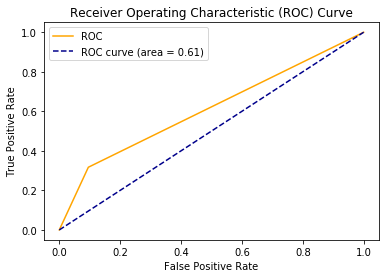

In [112]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print('The value of fpr is : ',fpr)
print('The value of tpr is : ',tpr)
print('The value of thresholds is : ',thresholds)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [164]:
x.head(2)

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0


In [ ]:
# We will do some hyper parameter tunning

In [113]:
param_grid={
    "penalty" : ['l2'] ,
    "C" : [100, 10, 1.0, 0.1, 0.01],
    "solver" : ['newton-cg', 'lbfgs', 'liblinear']    
}

In [114]:
rcv= GridSearchCV(lr,param_grid=param_grid,n_jobs= -1 ,cv=5,scoring='accuracy',verbose=3)
rcv.fit(x_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    9.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=3,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [125]:
print('Best parameter are %s'%rcv.best_params_,' with score as : %.2f '%rcv.best_score_)

Best parameter are {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}  with score as : 0.71 


In [116]:
lr_new = LogisticRegression(solver= 'newton-cg', penalty= 'l2', C = 10)
lr_new.fit(x_train,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
print('The score for Training data is: ',lr_new.score(x_train,y_train))
print('The score for Testing data is: ',lr_new.score(x_test,y_test))

The score for Training data is:  0.7136573104315039
The score for Testing data is:  0.7229899497487438
